Accuracy Summary:
  Condition      mean       std  count
0   Neutral  0.555556  0.497192    864
1  Pleasant  1.000000  0.000000    864


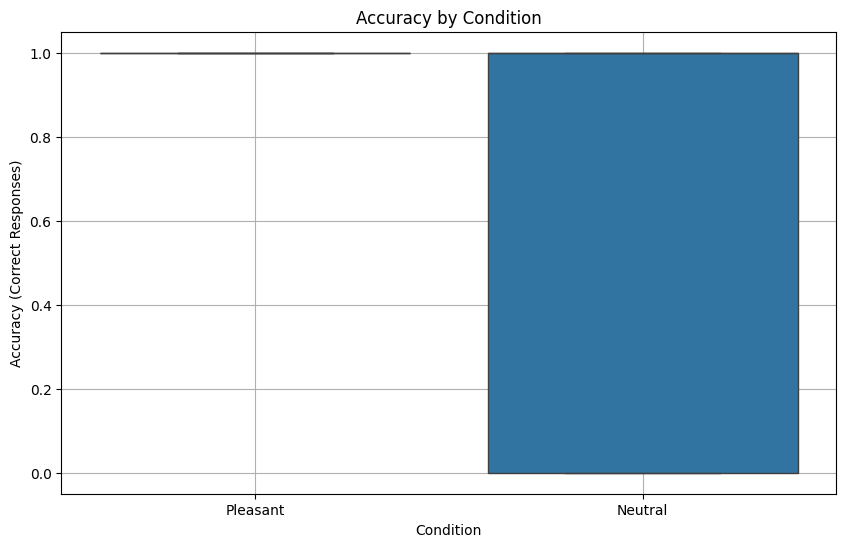

Shapiro-Wilk Test for Pleasant Condition: ShapiroResult(statistic=1.0, pvalue=1.0)
Shapiro-Wilk Test for Neutral Condition: ShapiroResult(statistic=0.6320789693017541, pvalue=2.136017333487875e-39)
Levene's Test: LeveneResult(statistic=690.4, pvalue=2.7942800285911383e-128)
Mann-Whitney U test result: MannwhitneyuResult(statistic=539136.0, pvalue=1.280608811712266e-109)


C:\Users\jdiaz\AppData\Local\Temp\ipykernel_5736\1962351208.py:55: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  shapiro_pleasant = stats.shapiro(combined_data[combined_data['Condition'] == 'Pleasant']['Accuracy'])


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define paths
pleasant_condition_path = r'C:\Users\jdiaz\Desktop\DTU_ExperimentCognitiveScience\pleasant'
neutral_condition_path = r'C:\Users\jdiaz\Desktop\DTU_ExperimentCognitiveScience\neutral'

# Function to read data from files
def read_data(condition_path):
    data = []
    for filename in os.listdir(condition_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(condition_path, filename)
            df = pd.read_csv(file_path)
            data.append(df)
    return pd.concat(data, ignore_index=True)

# Read data for both conditions
pleasant_data = read_data(pleasant_condition_path)
neutral_data = read_data(neutral_condition_path)

# Add a column for condition
pleasant_data['Condition'] = 'Pleasant'
neutral_data['Condition'] = 'Neutral'

# Combine data into a single DataFrame
combined_data = pd.concat([pleasant_data, neutral_data], ignore_index=True)

# Calculate accuracy
combined_data['Accuracy'] = combined_data['Accuracy'].astype(int)

# Group by condition and calculate mean accuracy and standard deviation
accuracy_summary = combined_data.groupby('Condition')['Accuracy'].agg(['mean', 'std', 'count']).reset_index()

# Print summary statistics
print("Accuracy Summary:")
print(accuracy_summary)

# Visualization of accuracy
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition', y='Accuracy', data=combined_data)
plt.title('Accuracy by Condition')
plt.ylabel('Accuracy (Correct Responses)')
plt.xlabel('Condition')
plt.grid()
plt.savefig(r'C:\Users\jdiaz\Desktop\DTU_ExperimentCognitiveScience\accuracy_by_condition.png')
plt.show()

# Statistical tests
# Check normality using Shapiro-Wilk test
shapiro_pleasant = stats.shapiro(combined_data[combined_data['Condition'] == 'Pleasant']['Accuracy'])
shapiro_neutral = stats.shapiro(combined_data[combined_data['Condition'] == 'Neutral']['Accuracy'])

print(f"Shapiro-Wilk Test for Pleasant Condition: {shapiro_pleasant}")
print(f"Shapiro-Wilk Test for Neutral Condition: {shapiro_neutral}")

# Levene's test for equality of variances
levene_test = stats.levene(
    combined_data[combined_data['Condition'] == 'Pleasant']['Accuracy'],
    combined_data[combined_data['Condition'] == 'Neutral']['Accuracy']
)

print(f"Levene's Test: {levene_test}")

# Two-sample t-test if assumptions are met
if shapiro_pleasant.pvalue > 0.05 and shapiro_neutral.pvalue > 0.05 and levene_test.pvalue > 0.05:
    t_test_result = stats.ttest_ind(
        combined_data[combined_data['Condition'] == 'Pleasant']['Accuracy'],
        combined_data[combined_data['Condition'] == 'Neutral']['Accuracy'],
        equal_var=True
    )
    print(f"Two-sample t-test result: {t_test_result}")
else:
    # Mann-Whitney U test as a non-parametric alternative
    mann_whitney_result = stats.mannwhitneyu(
        combined_data[combined_data['Condition'] == 'Pleasant']['Accuracy'],
        combined_data[combined_data['Condition'] == 'Neutral']['Accuracy'],
        alternative='greater'
    )
    print(f"Mann-Whitney U test result: {mann_whitney_result}")

# Save summary statistics to a CSV file
accuracy_summary.to_csv(r'C:\Users\jdiaz\Desktop\DTU_ExperimentCognitiveScience\accuracy_summary.csv', index=False)
